In [1]:
!pip install mitsuba

In [2]:
import mitsuba as mi
import numpy as np
import matplotlib.pyplot as plt

In [3]:
#mi.set_variant("cuda_ad_rgb")
mi.set_variant("scalar_rgb")
print(mi.variants())

['scalar_rgb', 'scalar_spectral', 'scalar_spectral_polarized', 'llvm_ad_rgb', 'llvm_ad_mono', 'llvm_ad_mono_polarized', 'llvm_ad_spectral', 'llvm_ad_spectral_polarized', 'cuda_ad_rgb', 'cuda_ad_mono', 'cuda_ad_mono_polarized', 'cuda_ad_spectral', 'cuda_ad_spectral_polarized']


*Select backend*

In [4]:
mi.set_variant('scalar_rgb')

*Scene definition*

In [5]:
scene_dict = {
    'type': 'scene',

    # --- INTEGRATOR: Defines the rendering algorithm ---
    'integrator': {
        'type': 'path',         # Path Tracing: Simulates light bouncing realistically.
        'max_depth': 5          # Number of light bounces allowed before terminating a path.
    },

    # --- SENSOR: Defines the camera through which the scene is viewed ---
    'sensor': {
        'type': 'perspective',  # Standard perspective projection (mimics a real lens).
        'fov': 45,              # Field of View in degrees.
        'to_world': mi.ScalarTransform4f.look_at(
            origin=[0, 1.5, 4], # Camera position (X, Y, Z).
            target=[0, 1, 0],   # The point the camera is looking at.
            up=[0, 1, 0]        # Defines which direction is "up" (usually Y-axis).
        ),
        'sampler': {
            'type': 'independent', # Strategy for generating random numbers for ray samples.
            'sample_count': 64     # Samples per pixel (SPP). Higher = less noise, slower render.
        },
        'film': {
            'type': 'hdrfilm',     # Stores data in High Dynamic Range (retains light intensity).
            'width': 512,          # Output image width in pixels.
            'height': 512,         # Output image height in pixels.
            'rfilter': {
                'type': 'box'      # Reconstruction filter: how samples are merged into a pixel.
            }
        }
    },

    # --- SHAPE (Ground): A large rectangle acting as the floor ---
    'ground': {
        'type': 'rectangle',
        'to_world': mi.ScalarTransform4f.scale([5, 5, 1]), # Scales the default 2x2 square to 10x10.
        'bsdf': {                  # BSDF = Bidirectional Scattering Distribution Function (Material).
            'type': 'diffuse',     # A matte, non-shiny surface (Lambertian).
            'reflectance': {
                'type': 'rgb',
                'value': [0.6, 0.6, 0.6] # Mid-gray color.
            }
        }
    },

    # --- SHAPE (Sphere): The main object in the scene ---
    'sphere': {
        'type': 'sphere',
        'to_world': mi.ScalarTransform4f.translate([0, 1, 0]), # Positions sphere 1 unit up.
        'bsdf': {
            'type': 'diffuse',
            'reflectance': {
                'type': 'rgb',
                'value': [0.2, 0.4, 0.8] # A soft blue color.
            }
        }
    },

    # --- EMITTER: An object that actually emits light into the scene ---
    'light': {
        'type': 'rectangle',
        'to_world': (
            mi.ScalarTransform4f.translate([0, 4, 0]) @ # Moves light to the ceiling.
            mi.ScalarTransform4f.scale([1.5, 1.5, 1])   # Increases the surface area of light.
        ),
        'emitter': {
            'type': 'area',        # "Area light": The geometry itself glows.
            'radiance': {
                'type': 'rgb',
                'value': [10, 10, 10] # Intensity of light (can exceed 1.0 in HDR).
            }
        }
    }
}

scene = mi.load_dict(scene_dict)

*Rendering*

In [6]:
image = mi.render(scene)

In [7]:
# Mitsuba returns a linear HDR array
image_np = np.array(image).reshape((512, 512, 3))

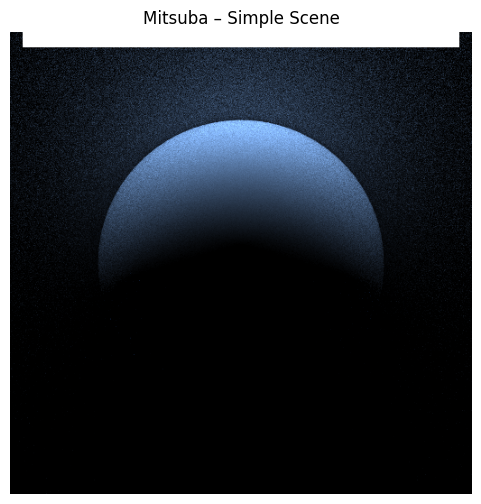

In [8]:
plt.figure(figsize=(6, 6))
plt.imshow(np.clip(image_np ** (1/2.2), 0, 1))  # gamma correction
plt.axis('off')
plt.title("Mitsuba – Simple Scene")
plt.show()